In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
pd.options.mode.chained_assignment = None
%matplotlib inline

In [56]:
import geopandas as gpd
from shapely.geometry import Point
barrios_populares = pd.read_csv('/home/ramiro/Escritorio/Datos/barriospopulares.csv')
barrios_populares.head()

,barrio_nombre,localidad_comuna_nombre,partido_departamento_nombre,provincia_nombre,geojson
0,74 y 140,Los Hornos,La Plata,Buenos Aires,"{""type"":""MultiPolygon"",""coordinates"":[[[[-57.9..."
1,Nuevo Madryn,Puerto Madryn,Biedma,Chubut,"{""type"":""MultiPolygon"",""coordinates"":[[[[-65.0..."
2,Ceamse,William Morris,Hurlingham,Buenos Aires,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.6..."
3,La Guarida,Pergamino,Pergamino,Buenos Aires,"{""type"":""MultiPolygon"",""coordinates"":[[[[-60.5..."
4,Ferroviario,Tierras Altas,Malvinas Argentinas,Buenos Aires,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.7..."


https://stackoverflow.com/questions/32642067/how-do-i-extract-longitude-latitude-from-geojson-column-in-my-data

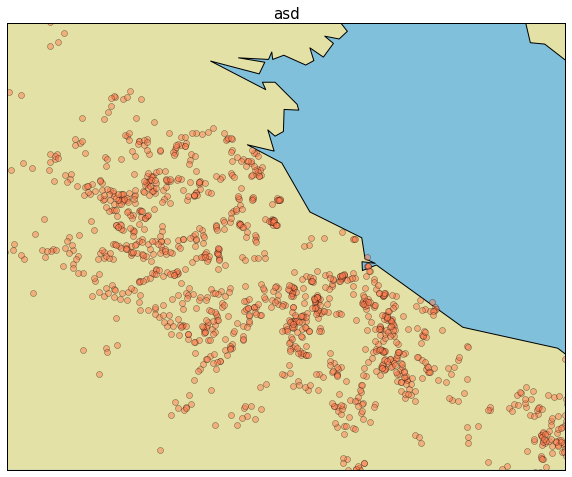

In [73]:
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
latitude= -35
longitude = -58
m = Basemap(ax=axes,projection='cyl',lon_0=longitude, lat_0=latitude,
            llcrnrlat=latitude, urcrnrlat=latitude + 0.8,
            llcrnrlon=longitude - 1.0, urcrnrlon=longitude,
            resolution='i')
m.drawmapboundary(fill_color='#81c0da')
m.fillcontinents(color='#e3e1a5',lake_color='#81c0da')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
coordenadas = barrios_populares['geojson']
for i in range(len(coordenadas)):
    df = pd.read_json(coordenadas[i])
    coords = df['coordinates']
    lon = coords[0][0][0][0]
    lat = coords[0][0][0][1]
    (x,y) = m(lon, lat)
    m.plot(x, y, 'bo', alpha=0.5, color = 'coral')
plt.title('asd',fontsize=15)
plt.show()


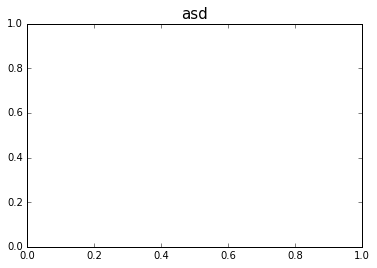

AttributeError: 'DataFrame' object has no attribute 'lon'

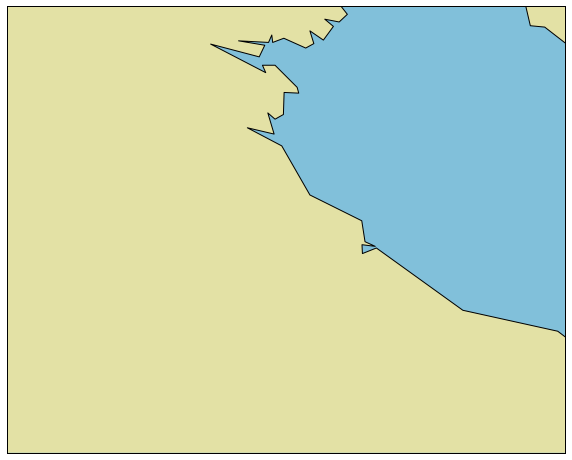

In [4]:


plot_map_with_dots(barrios_populares,'darkred','Ubicacion de propiedades vendidas a un precio alto')



In [10]:
alumnos_grado_alcohol = alumnos[['famsize','consumo_alcohol']]
alumnos_grado_alcohol.head()

,famsize,consumo_alcohol
0,GT3,2
1,GT3,2
2,LE3,5
3,GT3,2
4,GT3,3


In [11]:
agrupado = alumnos_grado_alcohol.loc[:,['famsize', 'consumo_alcohol']].groupby('famsize').\
    agg([np.mean])
orden_alcoholizacion = agrupado.sort_values(('consumo_alcohol','mean'), ascending=False) 
orden_alcoholizacion.head()

,consumo_alcohol
,mean
famsize,
LE3,4.065359
GT3,3.659892
